In [1]:
import os
import datetime
import numpy as np
import scipy
from scipy import signal
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
import stft

%matplotlib inline

In [40]:
file = '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/meteors/2017/09/04/19/20170904192557959_ZVPP-R6_raws.fits'

hdulist = fits.open(file)
scidata = hdulist[0].data
x = hdulist[0].header['NAXIS1']
y = hdulist[0].header['NAXIS2']
rx,ry = scidata.shape
print(x*y)
print(rx*ry)

flat_data = np.ravel(scidata.data)

complex_data  = flat_data[0::2] + 1j * flat_data[1::2]
print(complex_data)


2304000
2304000
[ -7.37941358e-03+0.02391863j   1.12683782e-02-0.00888693j
  -5.40018154e-05+0.00369751j ...,  -2.62028016e-02+0.02429462j
   2.40206748e-04-0.00758052j  -2.78806710e-03-0.00373709j]


1152000
1152000
1152000


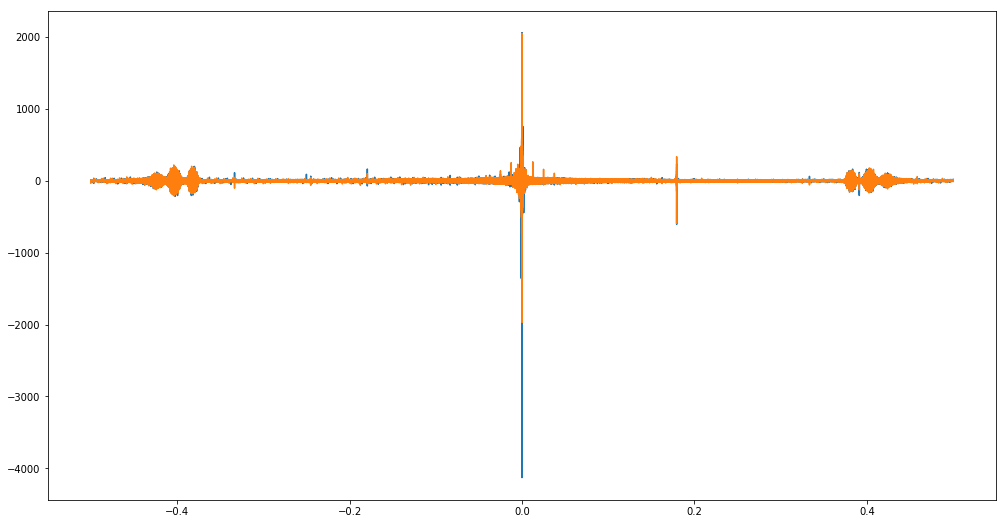

In [41]:
plt.figure(figsize=(17, 9))

sp = np.fft.fft(complex_data)
freq = np.fft.fftfreq(complex_data.shape[-1])
#plt.plot(freq, flat_data.real, freq, flat_data.imag)
#plt.plot(freq, sp.real, freq, sp.imag)
plt.plot(freq, sp.real)
plt.plot(freq, sp.imag)
print(complex_data.size)
print(freq.size)
print(sp.real.size)
plt.show()

[-0.00737941  0.02391863  0.01126838 ..., -0.00758052 -0.00278807
 -0.00373709]
(1921, 2401)
(2401, 1921)


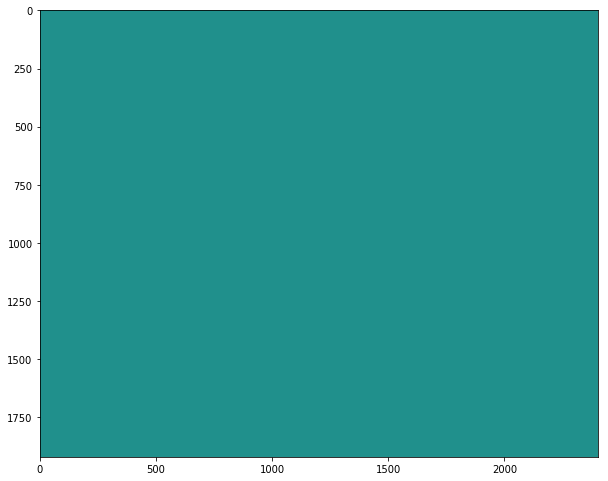

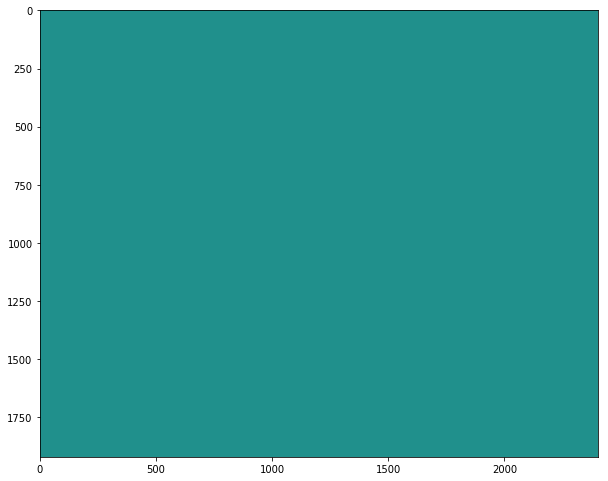

In [42]:
print(flat_data)
specgram = stft.spectrogram(flat_data.imag, framelength=4800, overlap=4)
print(specgram.real.T.shape)
print(specgram.shape)

plt.figure(figsize=(10, 20))
plt.imshow(specgram.real.T, interpolation='none', vmin=-1, vmax=1)
plt.show()
plt.figure(figsize=(10, 20))
plt.imshow(specgram.imag.T, interpolation='none', vmin=-0.5, vmax=0.5)
plt.show()

In [33]:
fits.writeto('output_file.fits', np.clip(specgram.real.T,-5,5), hdulist[0].header, clobber=True)

In [36]:
fits.writeto('output_file.fits', specgram.real.T, hdulist[0].header, clobber=True)